In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline

In [19]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

In [20]:
data = pd.concat([train, test], sort=False).reset_index(drop=True)

print(data.shape)
data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data['Fare'].fillna(0, inplace=True)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

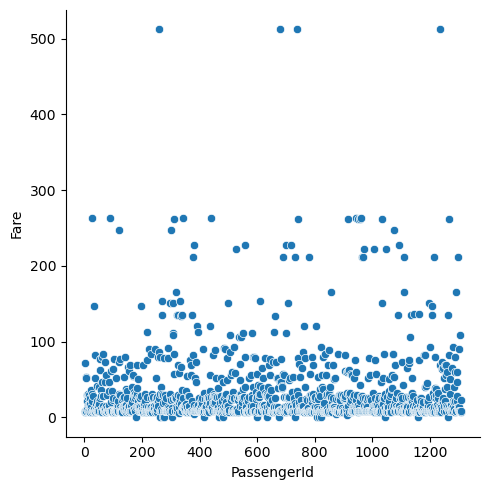

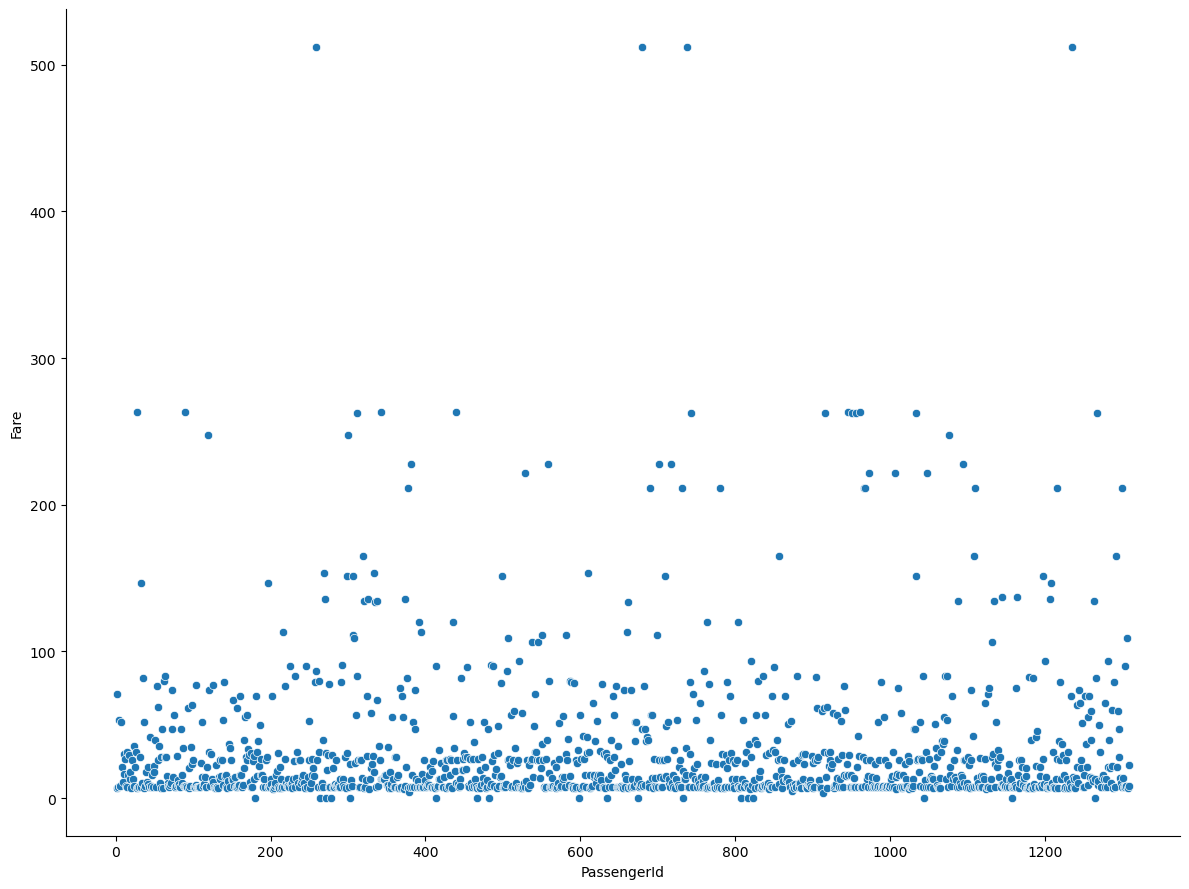

In [22]:
# 데이터 시각화
sns.relplot(x='PassengerId', y='Fare', data=data)
sns.relplot(x='PassengerId', y='Fare', data=data, height=9, aspect=12/9)

plt.show()  

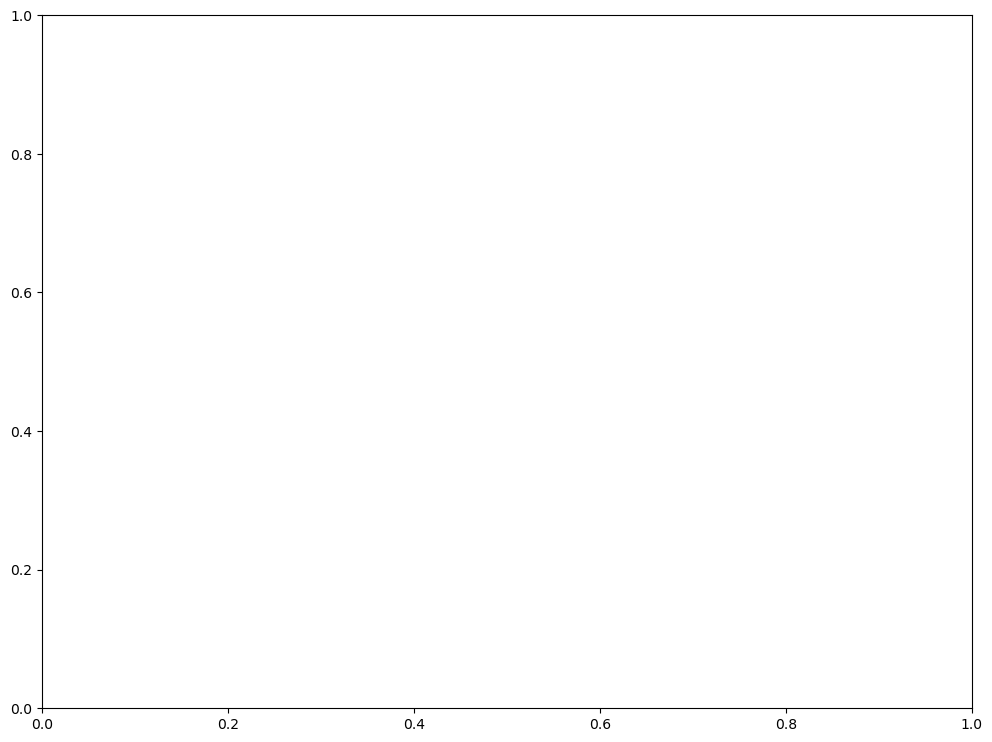

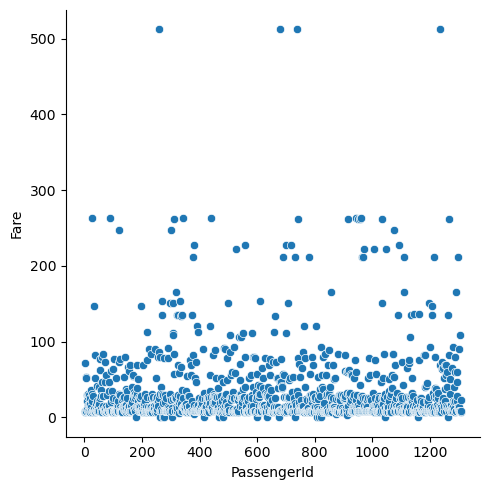

In [26]:
fig, ax =plt.subplots(figsize=(12, 9))
sns.relplot(x='PassengerId', y='Fare', data=data, ax=ax)

plt.show()

In [28]:
plt.Figure(figsize=(12, 9))

plt.show()

<Figure size 640x480 with 0 Axes>

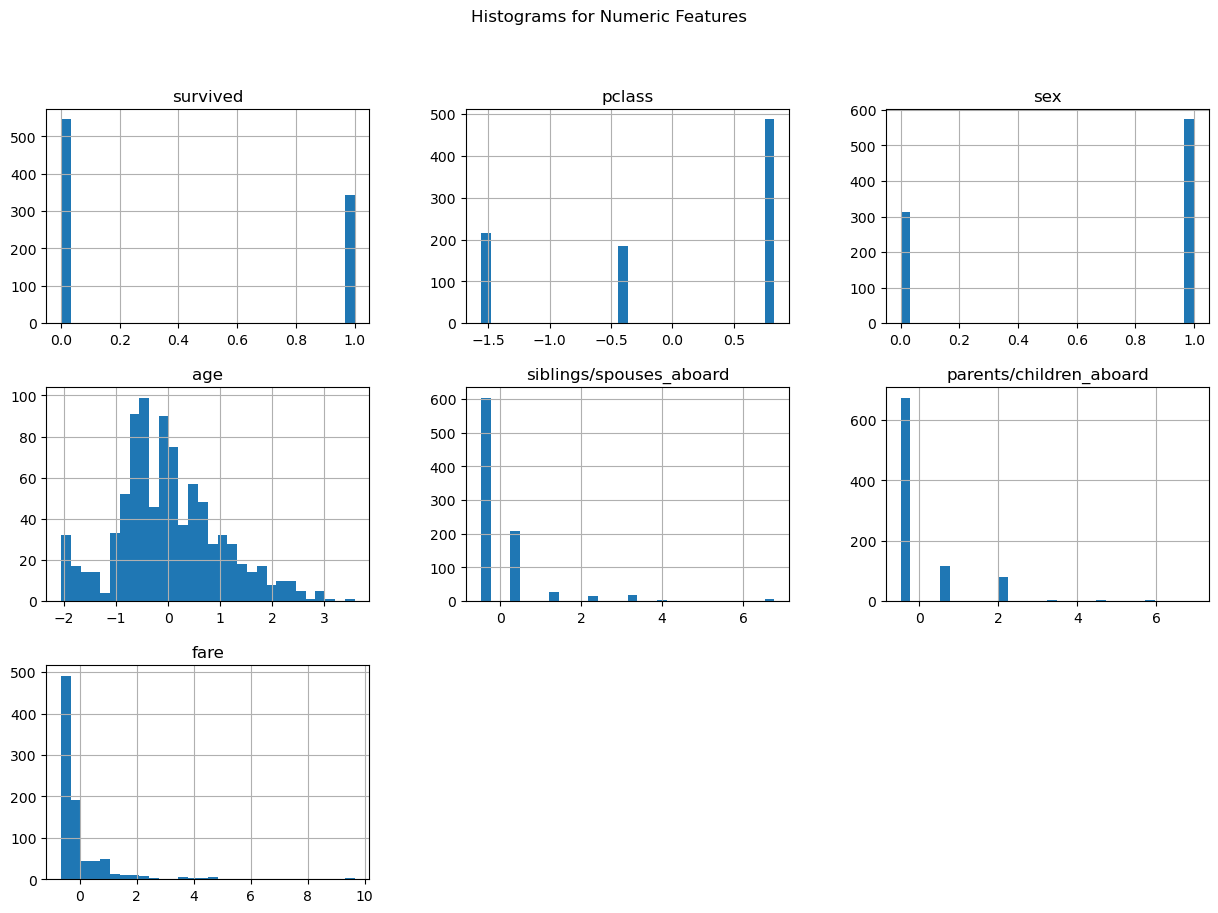

Cross-Validation Scores: [0.78225806 0.88709677 0.83870968 0.77419355 0.80645161]
Mean Score: 0.8177


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터셋 로드
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# 전처리
preprocessor = DataPreprocessor(data)
data = preprocessor.preprocess(missing_strategy='mean', drop_columns=['name', 'cabin'])

# 'sex' 컬럼 레이블 인코딩 (male -> 0, female -> 1)
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])

# 'survived' 컬럼에서 NaN 값 채우기 및 타입 정리 (0, 1로만 구성)
data['survived'] = data['survived'].fillna(0).astype(int)

# EDA
eda = EDA(data)
eda.plot_histograms()

# 데이터 분할
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습 및 교차 검증
model = LogisticRegression()
trainer = ModelTrainer(model, X_train, y_train)
trainer.train()
trainer.cross_validate()